<a href="https://colab.research.google.com/github/mfathul21/scorecard-credit-prediction/blob/main/Scorecard_Credit_Prediction_PB_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Credit Risk Prediction Project**

## **Load Data Training and Testing**

In [69]:
import utils 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay

df_model = pd.DataFrame()
config_data = utils.config_load()

In [2]:
X_train = utils.pickle_load(config_data['train_path'][0])
y_train = utils.pickle_load(config_data['train_path'][1])
X_test = utils.pickle_load(config_data['test_path'][0])
y_test = utils.pickle_load(config_data['test_path'][1])

In [3]:
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train.sample(5)

X_train shape: (662538, 62)
X_test shape: (93257, 62)
y_train shape: (662538,)
y_test shape: (93257,)


,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,verification_status:Not Verified,verification_status:Source Verified,...,total_rev_hi_lim:20k-40k,total_rev_hi_lim:40k-65k,total_rev_hi_lim:65k-95k,total_rev_hi_lim:>95k,term:36,mths_since_issue_d:<70,mths_since_issue_d:70-75,mths_since_issue_d:75-80,mths_since_issue_d:80-85,mths_since_issue_d:85-95
45842,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
233444,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
327976,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,1,0,0,0,0
358698,0,0,0,0,1,0,1,0,0,1,...,0,1,0,0,0,0,1,0,0,0
558856,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


## **White Box Model: Logistic Regression**

### **Training Moodel**

In [4]:
logreg = LogisticRegression(class_weight='balanced', random_state=42)
logreg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', random_state=42)

In [5]:
pd.options.display.max_rows = None
feature_name = X_train.columns.values

summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(logreg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', logreg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,-2.591650
1,grade:A,1.363826
2,grade:B,1.086205
3,grade:C,0.861436
4,grade:D,0.658826
5,grade:E,0.421766
6,grade:F,0.205128
7,home_ownership:OWN,0.100961
8,home_ownership:MORTGAGE,0.145129
9,verification_status:Not Verified,0.099902


### **Evaluation Model**

In [9]:
y_pred = logreg.predict(X_test)
y_pred

array([1, 0, 0, ..., 1, 1, 1])

In [14]:
y_pred_proba = logreg.predict_proba(X_test)
y_pred_proba

array([[0.34200798, 0.65799202],
       [0.57785341, 0.42214659],
       [0.50796408, 0.49203592],
       ...,
       [0.1629861 , 0.8370139 ],
       [0.24009184, 0.75990816],
       [0.28741194, 0.71258806]])

In [15]:
y_pred_proba = logreg.predict_proba(X_test)[: ][: , 1]
y_pred_proba

array([0.65799202, 0.42214659, 0.49203592, ..., 0.8370139 , 0.75990816,
       0.71258806])

In [17]:
y_test_temp = y_test.copy()
y_test_temp.reset_index(drop = True, inplace = True)

df_actual_predicted_probs = pd.concat([y_test_temp, pd.DataFrame(y_pred_proba)], axis = 1)
df_actual_predicted_probs.columns = ['y_targets_test', 'y_pred_proba']
df_actual_predicted_probs.index = y_test.index
df_actual_predicted_probs.head()

,y_targets_test,y_pred_proba
362514,1,0.657992
288564,1,0.422147
213591,1,0.492036
263083,1,0.654879
165001,1,0.761227


#### **Accuracy and AUC**

Accuracy: 0.8164427335213442
Precision: 0.9093287486918822
Recall: 0.8812024628757696
F1 Score: 0.8950446970533054



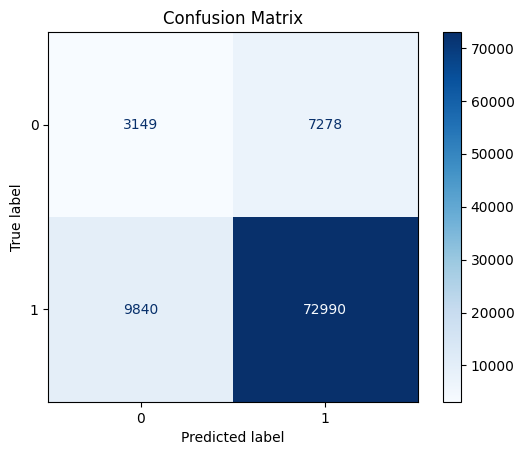

In [68]:
tr = 0.35
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_pred_proba'] > tr, 1, 0)
acc = accuracy_score(df_actual_predicted_probs['y_targets_test'], df_actual_predicted_probs['y_hat_test'])
precision = precision_score(df_actual_predicted_probs['y_targets_test'], df_actual_predicted_probs['y_hat_test'])
recall = recall_score(df_actual_predicted_probs['y_targets_test'], df_actual_predicted_probs['y_hat_test'])
f1 = f1_score(df_actual_predicted_probs['y_targets_test'], df_actual_predicted_probs['y_hat_test'])

print(f'Accuracy: {acc}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}\n')


cm = confusion_matrix(df_actual_predicted_probs['y_targets_test'], df_actual_predicted_probs['y_hat_test'])

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

By setting a threshold of 0.35, 81% model accuracy is obtained with 90% precision, 88% recall, and 89% f1 score.

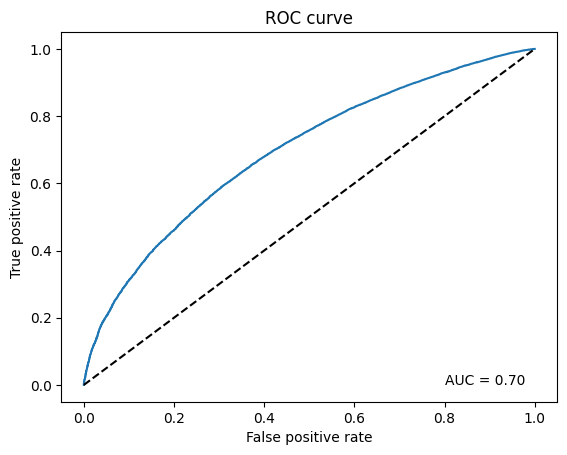

In [63]:
auroc = roc_auc_score(df_actual_predicted_probs['y_targets_test'],
                              df_actual_predicted_probs['y_pred_proba'])

fpr, tpr, tr = roc_curve(df_actual_predicted_probs['y_targets_test'], df_actual_predicted_probs['y_pred_proba'])
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.text(0.8, 0, 'AUC = %.2f' % auroc)
plt.title('ROC curve')
plt.show()

#### **Gini and Kolmogorov-Smirnov**

In credit risk modeling, the Gini coefficient is used for the same purpose of measuring the inequality between groups of non-defaulting or good borrowers and defaulting or bad borrowers within a population. Meanwhile, the Kolmogorov-Smirnov statistic indicates the extent to which the model separates good borrowers from those who are actually bad borrowers.

In [51]:
df_actual_predicted_probs = df_actual_predicted_probs.sort_values(by = 'y_pred_proba')
df_actual_predicted_probs.head()

,y_targets_test,y_pred_proba,y_hat_test
39810,0,0.084543,0
40518,0,0.085073,0
41234,0,0.094661,0
41760,1,0.096116,0
41742,1,0.096238,0


In [52]:
df_actual_predicted_probs.tail()

,y_targets_test,y_pred_proba,y_hat_test
246538,1,0.927276,1
261131,1,0.928448,1
236303,1,0.928750,1
250380,1,0.930800,1
239421,1,0.931207,1


In [53]:
df_actual_predicted_probs = df_actual_predicted_probs.reset_index()
df_actual_predicted_probs.head()

,index,y_targets_test,y_pred_proba,y_hat_test
0,39810,0,0.084543,0
1,40518,0,0.085073,0
2,41234,0,0.094661,0
3,41760,1,0.096116,0
4,41742,1,0.096238,0


In [54]:
df_actual_predicted_probs['Cumulative N Population'] = df_actual_predicted_probs.index + 1
df_actual_predicted_probs['Cumulative N Good'] = df_actual_predicted_probs['y_targets_test'].cumsum()
df_actual_predicted_probs['Cumulative N Bad'] = df_actual_predicted_probs['Cumulative N Population'] - df_actual_predicted_probs['y_targets_test'].cumsum()
df_actual_predicted_probs.head()

,index,y_targets_test,y_pred_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad
0,39810,0,0.084543,0,1,0,1
1,40518,0,0.085073,0,2,0,2
2,41234,0,0.094661,0,3,0,3
3,41760,1,0.096116,0,4,1,3
4,41742,1,0.096238,0,5,2,3


In [55]:
df_actual_predicted_probs['Cumulative Perc Population'] = df_actual_predicted_probs['Cumulative N Population'] / (df_actual_predicted_probs.shape[0])
df_actual_predicted_probs['Cumulative Perc Good'] = df_actual_predicted_probs['Cumulative N Good'] / df_actual_predicted_probs['y_targets_test'].sum()
df_actual_predicted_probs['Cumulative Perc Bad'] = df_actual_predicted_probs['Cumulative N Bad'] / (df_actual_predicted_probs.shape[0] - df_actual_predicted_probs['y_targets_test'].sum())
df_actual_predicted_probs.head()

,index,y_targets_test,y_pred_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad,Cumulative Perc Population,Cumulative Perc Good,Cumulative Perc Bad
0,39810,0,0.084543,0,1,0,1,0.000011,0.000000,0.000096
1,40518,0,0.085073,0,2,0,2,0.000021,0.000000,0.000192
2,41234,0,0.094661,0,3,0,3,0.000032,0.000000,0.000288
3,41760,1,0.096116,0,4,1,3,0.000043,0.000012,0.000288
4,41742,1,0.096238,0,5,2,3,0.000054,0.000024,0.000288


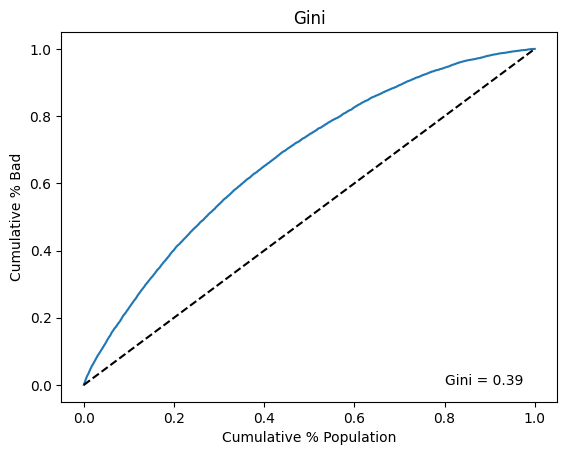

In [56]:
Gini = auroc * 2 - 1

plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Bad'])
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Population'], linestyle = '--', color = 'k')
plt.xlabel('Cumulative % Population')
plt.ylabel('Cumulative % Bad')
plt.text(0.8, 0, 'Gini = %.2f' % Gini)
plt.title('Gini')
plt.show()

The resulting Gini of 39% suggests that the PB model is moderately effective in differentiating borrowers based on their credit risk. Borrowers with high credit scores generally have easier and cheaper access to credit, while borrowers with low credit scores face greater barriers.

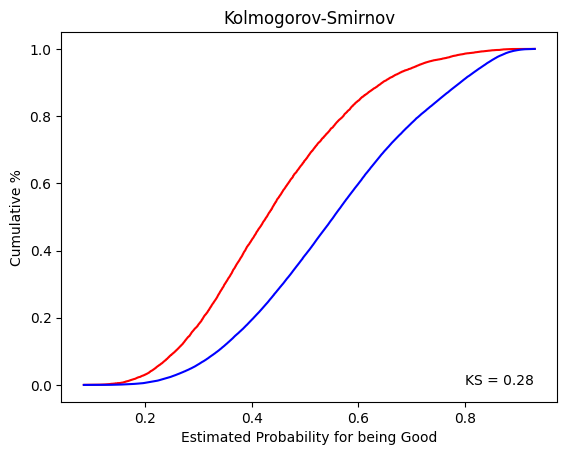

In [57]:
KS = max(df_actual_predicted_probs['Cumulative Perc Bad'] - df_actual_predicted_probs['Cumulative Perc Good'])

plt.plot(df_actual_predicted_probs['y_pred_proba'], df_actual_predicted_probs['Cumulative Perc Bad'], color = 'r')
plt.plot(df_actual_predicted_probs['y_pred_proba'], df_actual_predicted_probs['Cumulative Perc Good'], color = 'b')
plt.xlabel('Estimated Probability for being Good')
plt.ylabel('Cumulative %')
plt.text(0.8, 0, 'KS = %.2f' % KS)
plt.title('Kolmogorov-Smirnov')
plt.show()

The result we get for Kolmogorov-smirnov is about 0.28. The value is not very high. Neither is it close to one. However, it is much greater than zero. This value indicates that, as we can see on the graph, the two cumulative distribution functions are far enough away from each other that the model has satisfactory predictive power.

### **Black Box Model: Decision Tree and Naive Bayes**

In [70]:
dc = DecisionTreeClassifier(class_weight='balanced', random_state=42)
utils.training_model(dc, X_train, y_train, df_model)
utils.evaluation_model(dc, X_test, y_test, df_model)

,accuracy,precision,recall,f1_score,roc_auc_score
DecisionTreeClassifier - Train,0.927544,0.999467,0.855543,0.921922,0.928800
DecisionTreeClassifier - Validation,0.800905,0.894140,0.880031,0.887030,0.526166


In [71]:
nb = GaussianNB()
utils.training_model(nb, X_train, y_train, df_model)
utils.evaluation_model(nb, X_test, y_test, df_model)

,accuracy,precision,recall,f1_score,roc_auc_score
DecisionTreeClassifier - Train,0.927544,0.999467,0.855543,0.921922,0.928800
DecisionTreeClassifier - Validation,0.800905,0.894140,0.880031,0.887030,0.526166
GaussianNB - Train,0.620704,0.651736,0.518443,0.577496,0.668302
GaussianNB - Validation,0.541246,0.938411,0.517457,0.667077,0.670605


In [72]:
reg = LogisticRegression()
utils.training_model(reg, X_train, y_train, df_model)
utils.evaluation_model(reg, X_test, y_test, df_model)

,accuracy,precision,recall,f1_score,roc_auc_score
DecisionTreeClassifier - Train,0.927544,0.999467,0.855543,0.921922,0.928800
DecisionTreeClassifier - Validation,0.800905,0.894140,0.880031,0.887030,0.526166
GaussianNB - Train,0.620704,0.651736,0.518443,0.577496,0.668302
GaussianNB - Validation,0.541246,0.938411,0.517457,0.667077,0.670605
LogisticRegression - Train,0.637939,0.644809,0.614220,0.629142,0.690996
LogisticRegression - Validation,0.619793,0.936416,0.613594,0.741388,0.695317


In [76]:
new_order = ['LogisticRegression - Train', 'LogisticRegression - Validation',
             'GaussianNB - Train', 'GaussianNB - Validation',
             'DecisionTreeClassifier - Train', 'DecisionTreeClassifier - Validation']

df_model.reindex(new_order)

,accuracy,precision,recall,f1_score,roc_auc_score
LogisticRegression - Train,0.637939,0.644809,0.614220,0.629142,0.690996
LogisticRegression - Validation,0.619793,0.936416,0.613594,0.741388,0.695317
GaussianNB - Train,0.620704,0.651736,0.518443,0.577496,0.668302
GaussianNB - Validation,0.541246,0.938411,0.517457,0.667077,0.670605
DecisionTreeClassifier - Train,0.927544,0.999467,0.855543,0.921922,0.928800
DecisionTreeClassifier - Validation,0.800905,0.894140,0.880031,0.887030,0.526166
